<a href="https://colab.research.google.com/github/PoorviKejriwal/21BDS0094_EDA_Assignment/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#POORVI KEJRIWAL 21BDS0094
import pandas as pd
# Loading the dataset
file_path = 'smoking.csv'
df = pd.read_csv(file_path)
# Exploring the dimensions and summary of the dataset
print("Dataset Dimensions:", df.shape)
print("First few rows:\n", df.head())
print("Last few rows:\n", df.tail())
print("Summary statistics:\n", df.describe())
#Selecting a range of rows
df.iloc[10:15]
print("Dataset Info:\n", df.info())


Dataset Dimensions: (1691, 13)
First few rows:
    rownames  gender  age marital_status highest_qualification nationality  \
0         1    Male   38       Divorced      No Qualification     British   
1         2  Female   42         Single      No Qualification     British   
2         3    Male   40        Married                Degree     English   
3         4  Female   40        Married                Degree     English   
4         5  Female   39        Married          GCSE/O Level     British   

  ethnicity      gross_income     region smoke  amt_weekends  amt_weekdays  \
0     White    2,600 to 5,200  The North    No           NaN           NaN   
1     White       Under 2,600  The North   Yes          12.0          12.0   
2     White  28,600 to 36,400  The North    No           NaN           NaN   
3     White  10,400 to 15,600  The North    No           NaN           NaN   
4     White    2,600 to 5,200  The North    No           NaN           NaN   

      type  
0      

In [7]:
#Function to highlight the rows where age is greater> 50 and smoking ='yes'
def highlight_row(row):
    if row['age'] > 50 and row['smoke'] == 'Yes':
        return ['background-color: red'] * len(row)
    else:
        return [''] * len(row)
styled_df = df.style.apply(highlight_row, axis=1)
styled_df

In [11]:
#Function to highlight maximum and minimum values in each column
def highlight_max_min(s):
    if pd.api.types.is_numeric_dtype(s):
        is_max = s == s.max()
        is_min = s == s.min()
        return ['background-color: green' if v else 'background-color: yellow' if is_min[idx] else ''
                for idx, v in enumerate(is_max)]
    else:
        return [''] * len(s)
styled_df = df.style.apply(highlight_max_min, axis=0)
styled_df

In [12]:
#Using seaborn to apply gradient
import pandas as pd
import seaborn as sns
colorMap = sns.light_palette("pink", as_cmap=True)
styled = df.style.background_gradient(cmap=colorMap)
styled


In [13]:
#using stack() to pivot columns into rows
stacked_df = df.stack()
print("\nStacked DataFrame (columns as rows):\n", stacked_df)


Stacked DataFrame (columns as rows):
 0     rownames                                1
      gender                               Male
      age                                    38
      marital_status                   Divorced
      highest_qualification    No Qualification
                                     ...       
1690  nationality                      Scottish
      ethnicity                           White
      gross_income             10,400 to 15,600
      region                           Scotland
      smoke                                  No
Length: 18173, dtype: object


In [14]:
#unstacking
stacked_df.unstack()

rownames  gender age marital_status highest_qualification nationality  \
0           1    Male  38       Divorced      No Qualification     British   
1           2  Female  42         Single      No Qualification     British   
2           3    Male  40        Married                Degree     English   
3           4  Female  40        Married                Degree     English   
4           5  Female  39        Married          GCSE/O Level     British   
...       ...     ...  ..            ...                   ...         ...   
1686     1687    Male  22         Single      No Qualification    Scottish   
1687     1688  Female  49       Divorced      Other/Sub Degree     English   
1688     1689    Male  45        Married      Other/Sub Degree    Scottish   
1689     1690  Female  51        Married      No Qualification     English   
1690     1691    Male  31        Married                Degree    Scottish   

     ethnicity      gross_income     region smoke amt_weekends amt_weekdays  \
0        White    2,600 to 5,200  The North    No          NaN          NaN   
1        White       Under 2,600  The North   Yes         12.0         12.0   
2        White  28,600 to 36,400  The North    No          NaN          NaN   
3        White  10,400 to 15,600  The North    No          NaN          NaN   
4        White    2,600 to 5,200  The North    No          NaN          NaN   
...        ...               ...        ...   ...          ...          ...   
1686     White    2,600 to 5,200   Scotland    No          NaN          NaN   
1687     White    2,600 to 5,200   Scotland   Yes         20.0         20.0   
1688     White   5,200 to 10,400   Scotland    No          NaN          NaN   
1689     White    2,600 to 5,200   Scotland   Yes         20.0         20.0   
1690     White  10,400 to 15,600   Scotland    No          NaN          NaN   

             type  
0             NaN  
1         Packets  
2             NaN  
3             NaN  
4             NaN  
...           ...  
1686          NaN  
1687  Hand-Rolled  
1688          NaN  
1689      Packets  
1690          NaN  

[1691 rows x 13 columns]

In [15]:
#data deduplication
print("Duplicates in dataset: ", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates removed. Dataset shape: ", df.shape)


Duplicates in dataset:  0
Duplicates removed. Dataset shape:  (1691, 13)


In [17]:
#replacing values to make the dataset consistent
df['smoke'] = df['smoke'].replace({'yes': 'Yes', 'YES': 'Yes', 'no': 'No', 'NO': 'No'})
df

rownames  gender  age marital_status highest_qualification nationality  \
0            1    Male   38       Divorced      No Qualification     British   
1            2  Female   42         Single      No Qualification     British   
2            3    Male   40        Married                Degree     English   
3            4  Female   40        Married                Degree     English   
4            5  Female   39        Married          GCSE/O Level     British   
...        ...     ...  ...            ...                   ...         ...   
1686      1687    Male   22         Single      No Qualification    Scottish   
1687      1688  Female   49       Divorced      Other/Sub Degree     English   
1688      1689    Male   45        Married      Other/Sub Degree    Scottish   
1689      1690  Female   51        Married      No Qualification     English   
1690      1691    Male   31        Married                Degree    Scottish   

     ethnicity      gross_income     region smoke  amt_weekends  amt_weekdays  \
0        White    2,600 to 5,200  The North    No           NaN           NaN   
1        White       Under 2,600  The North   Yes          12.0          12.0   
2        White  28,600 to 36,400  The North    No           NaN           NaN   
3        White  10,400 to 15,600  The North    No           NaN           NaN   
4        White    2,600 to 5,200  The North    No           NaN           NaN   
...        ...               ...        ...   ...           ...           ...   
1686     White    2,600 to 5,200   Scotland    No           NaN           NaN   
1687     White    2,600 to 5,200   Scotland   Yes          20.0          20.0   
1688     White   5,200 to 10,400   Scotland    No           NaN           NaN   
1689     White    2,600 to 5,200   Scotland   Yes          20.0          20.0   
1690     White  10,400 to 15,600   Scotland    No           NaN           NaN   

             type  
0             NaN  
1         Packets  
2             NaN  
3             NaN  
4             NaN  
...           ...  
1686          NaN  
1687  Hand-Rolled  
1688          NaN  
1689      Packets  
1690          NaN  

[1691 rows x 13 columns]

In [20]:
import numpy as np
# handling missing data and data cleaning
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
#Filling missing values for numeric columns with the mean
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
#Filling missing values for non-numeric columns with the mode (most frequent value)
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_columns] = df[non_numeric_columns].fillna(df[non_numeric_columns].mode().iloc[0])
print("Missing values after handling:\n", df.isnull().sum())

Missing values in each column:
 rownames                    0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64
Missing values after handling:
 rownames                 0
gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
dtype: int64


In [22]:
#Renaming axis indexes
print("Original column labels:\n", df.columns)
df.columns = df.columns.map(str.upper)
print("\nTransformed column labels:\n", df.columns)
print("\nDataFrame after column transformation:\n", df.head())

Original column labels:
 Index(['ROWNAMES', 'GENDER', 'AGE', 'MARITAL_STATUS', 'HIGHEST_QUALIFICATION',
       'NATIONALITY', 'ETHNICITY', 'GROSS_INCOME', 'REGION', 'SMOKE',
       'AMT_WEEKENDS', 'AMT_WEEKDAYS', 'TYPE'],
      dtype='object')

Transformed column labels:
 Index(['ROWNAMES', 'GENDER', 'AGE', 'MARITAL_STATUS', 'HIGHEST_QUALIFICATION',
       'NATIONALITY', 'ETHNICITY', 'GROSS_INCOME', 'REGION', 'SMOKE',
       'AMT_WEEKENDS', 'AMT_WEEKDAYS', 'TYPE'],
      dtype='object')

DataFrame after column transformation:
    ROWNAMES  GENDER  AGE MARITAL_STATUS HIGHEST_QUALIFICATION NATIONALITY  \
0         1    Male   38       Divorced      No Qualification     British   
1         2  Female   42         Single      No Qualification     British   
2         3    Male   40        Married                Degree     English   
3         4  Female   40        Married                Degree     English   
4         5  Female   39        Married          GCSE/O Level     British   

  ET

In [29]:
#discretization, binning and outlier detection
import pandas as pd
import numpy as np
from scipy import stats
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['Underage', 'Young', 'Middle-aged', 'Old', 'Very Old']
df['AGE_BINNED'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels)
print("Binned Age Categories:\n", df[['AGE', 'AGE_BINNED']].head())
threshold_weekends = 50
outliers_weekends = df[np.abs(df['AMT_WEEKENDS']) > threshold_weekends]
print("\nOutliers in 'AMT_WEEKENDS' where values exceed {}:\n".format(threshold_weekends), outliers_weekends)
threshold_weekdays = 50
outliers_weekdays = df[np.abs(df['AMT_WEEKDAYS']) > threshold_weekdays]
print("\nOutliers in 'AMT_WEEKDAYS' where values exceed {}:\n".format(threshold_weekdays), outliers_weekdays)
high_value_threshold = 100
high_value_transactions = df[(df['AMT_WEEKENDS'] > high_value_threshold) | (df['AMT_WEEKDAYS'] > high_value_threshold)]
print("\nRows where 'AMT_WEEKENDS' or 'AMT_WEEKDAYS' exceed {}:\n".format(high_value_threshold), high_value_transactions)


Binned Age Categories:
    AGE   AGE_BINNED
0   38  Middle-aged
1   42  Middle-aged
2   40  Middle-aged
3   40  Middle-aged
4   39  Middle-aged

Outliers in 'AMT_WEEKENDS' where values exceed 50:
       ROWNAMES  GENDER  AGE MARITAL_STATUS HIGHEST_QUALIFICATION NATIONALITY  \
1182      1183    Male   35         Single          GCSE/O Level     British   
1659      1660  Female   31         Single      Other/Sub Degree    Scottish   

     ETHNICITY     GROSS_INCOME      REGION SMOKE  AMT_WEEKENDS  AMT_WEEKDAYS  \
1182     White   2,600 to 5,200  South East   Yes          60.0          40.0   
1659     White  5,200 to 10,400    Scotland   Yes          60.0          30.0   

         TYPE AGE_BINNED  Z_SCORE_WEEKENDS  Z_SCORE_WEEKDAYS  
1182  Packets      Young          8.840917          5.610222  
1659  Packets      Young          8.840917          3.472946  

Outliers in 'AMT_WEEKDAYS' where values exceed 50:
      ROWNAMES GENDER  AGE MARITAL_STATUS HIGHEST_QUALIFICATION NATIONALITY  

In [27]:
 #permutation, random sampling (both with and without replacement), and creating dummy variables
print("Column names in the dataset:\n", df.columns)
sampler = np.random.permutation(len(df))
permuted_df = df.take(sampler)
print("\nPermuted DataFrame (first 5 rows):\n", permuted_df.head())
random_sample_without_replacement = df.take(np.random.permutation(len(df))[:3])
print("\nRandom Sampling Without Replacement (first 3 rows):\n", random_sample_without_replacement)
sampler_with_replacement = np.random.randint(0, len(df), size=5)
random_sample_with_replacement = df.take(sampler_with_replacement)
print("\nRandom Sampling With Replacement (5 rows):\n", random_sample_with_replacement)
dummies_smoke = pd.get_dummies(df['SMOKE'], prefix='SMOKE')
print("\nDummy Variables for 'SMOKE':\n", dummies_smoke.head())
df_with_dummies = pd.concat([df, dummies_smoke], axis=1)
print("\nDataFrame with Dummy Variables:\n", df_with_dummies.head())


Column names in the dataset:
 Index(['ROWNAMES', 'GENDER', 'AGE', 'MARITAL_STATUS', 'HIGHEST_QUALIFICATION',
       'NATIONALITY', 'ETHNICITY', 'GROSS_INCOME', 'REGION', 'SMOKE',
       'AMT_WEEKENDS', 'AMT_WEEKDAYS', 'TYPE', 'AGE_BINNED',
       'Z_SCORE_WEEKENDS', 'Z_SCORE_WEEKDAYS'],
      dtype='object')

Permuted DataFrame (first 5 rows):
       ROWNAMES  GENDER  AGE MARITAL_STATUS HIGHEST_QUALIFICATION NATIONALITY  \
306        307  Female   18         Single          GCSE/O Level     British   
17          18    Male   47       Divorced      No Qualification     British   
1450      1451  Female   38        Married      No Qualification     English   
1442      1443    Male   28         Single              ONC/BTEC     English   
720        721    Male   73        Married      No Qualification     English   

     ETHNICITY      GROSS_INCOME                  REGION SMOKE  AMT_WEEKENDS  \
306      White           Refused               The North   Yes      8.000000   
17       Whi


Univariate Analysis for 'age'
Mean Age: 49.836191602602014
Median Age: 48.0
Mode Age: 40


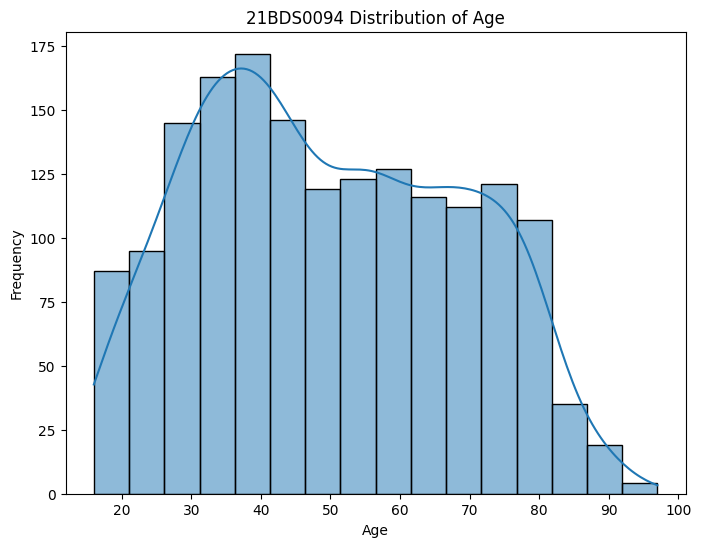

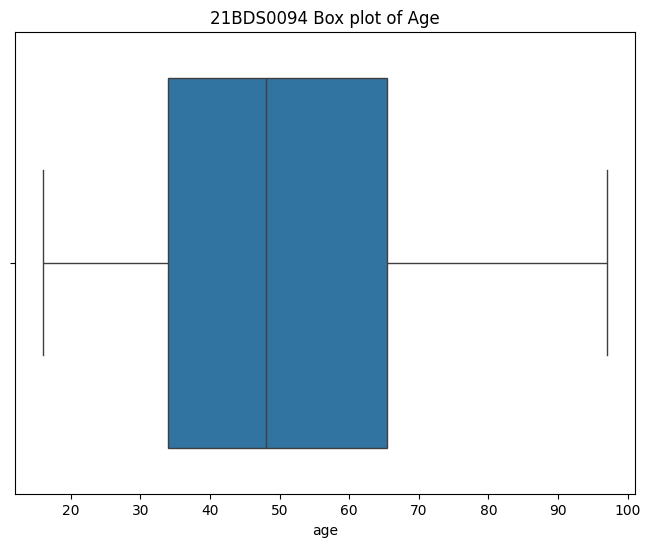


Bivariate Analysis: Relationship between 'age' and 'amt_weekends'


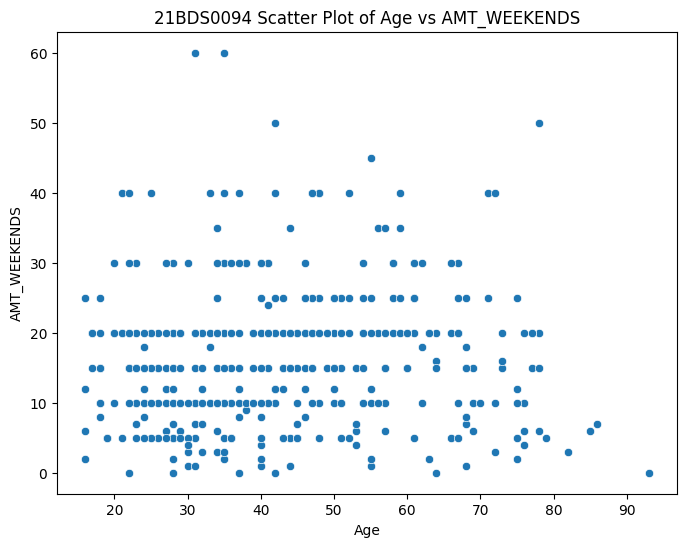

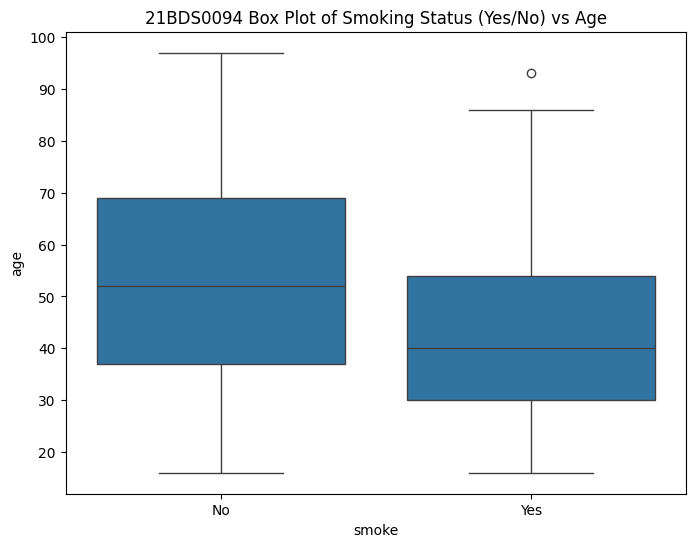


21BDS0094 Multivariate Analysis: Pair plot between 'age', 'amt_weekends', and 'amt_weekdays'


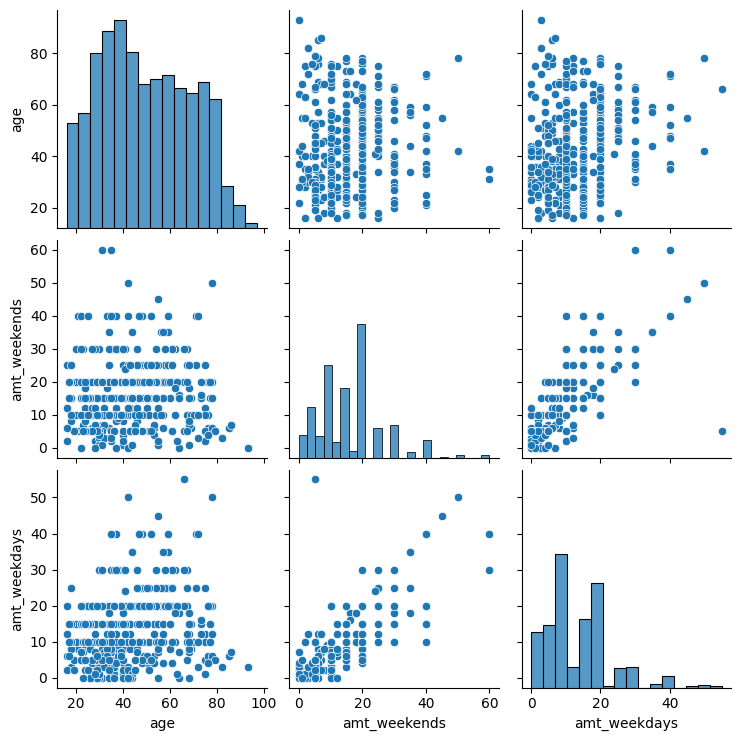

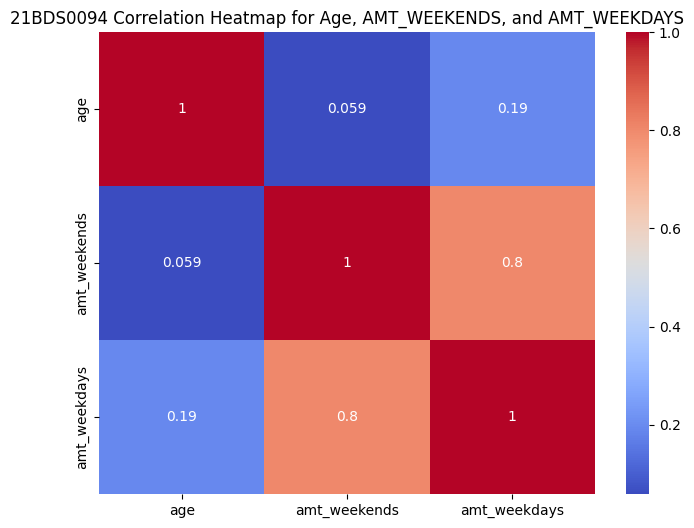

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
# Univariate Analysis for 'age'
print("\nUnivariate Analysis for 'age'")
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title("21BDS0094 Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title("21BDS0094 Box plot of Age")
plt.show()
print("\nBivariate Analysis: Relationship between 'age' and 'amt_weekends'")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='amt_weekends', data=df)
plt.title("21BDS0094 Scatter Plot of Age vs AMT_WEEKENDS")
plt.xlabel("Age")
plt.ylabel("AMT_WEEKENDS")
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoke', y='age', data=df)
plt.title("21BDS0094 Box Plot of Smoking Status (Yes/No) vs Age")
plt.show()
print("\n21BDS0094 Multivariate Analysis: Pair plot between 'age', 'amt_weekends', and 'amt_weekdays'")
sns.pairplot(df, vars=['age', 'amt_weekends', 'amt_weekdays'], kind='scatter')
plt.show()
correlation = df[['age', 'amt_weekends', 'amt_weekdays']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("21BDS0094 Correlation Heatmap for Age, AMT_WEEKENDS, and AMT_WEEKDAYS")
plt.show()


In [36]:
# Contingency table for gender and smoking status
contingency_table = pd.crosstab(df['gender'], df['smoke'])
print(contingency_table)

smoke    No  Yes
gender          
Female  731  234
Male    539  187


Skewness of Age: 0.16729024647278307, Kurtosis of Age: -1.0037279758309108
Skewness of Amount Smoked on Weekends: 0.9914680622531027, Kurtosis: 1.7680119437503343
Skewness of Amount Smoked on Weekdays: 1.1163983553338912, Kurtosis: 1.878219182145882


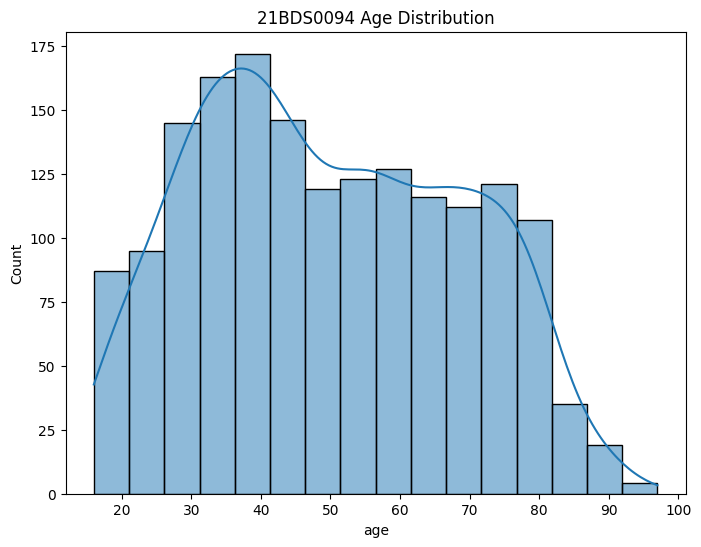

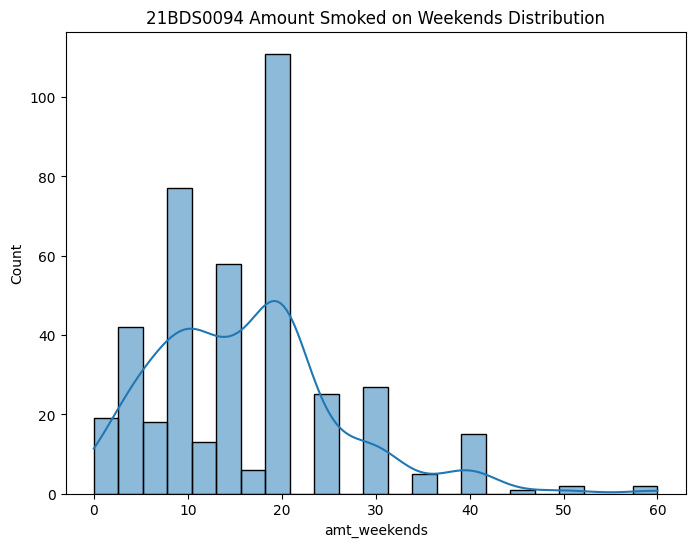

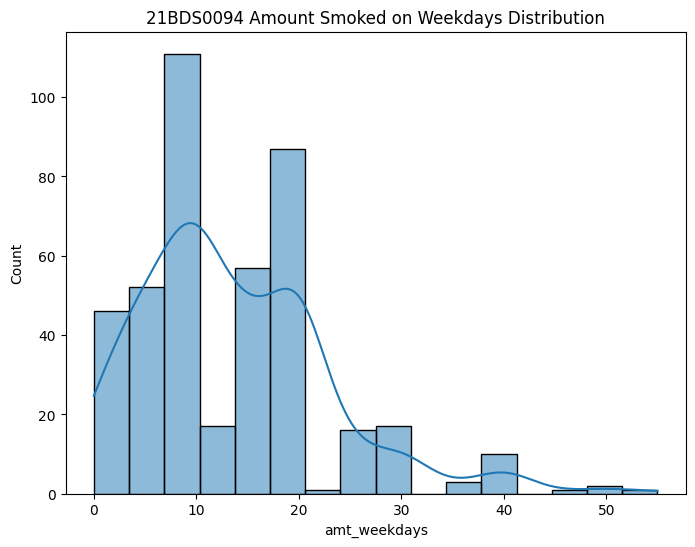

In [39]:
# Skewness and Kurtosis
skewness_age = df['age'].skew()
kurtosis_age = df['age'].kurt()
skewness_amt_weekends = df['amt_weekends'].skew()
kurtosis_amt_weekends = df['amt_weekends'].kurt()
skewness_amt_weekdays = df['amt_weekdays'].skew()
kurtosis_amt_weekdays = df['amt_weekdays'].kurt()
print(f"Skewness of Age: {skewness_age}, Kurtosis of Age: {kurtosis_age}")
print(f"Skewness of Amount Smoked on Weekends: {skewness_amt_weekends}, Kurtosis: {kurtosis_amt_weekends}")
print(f"Skewness of Amount Smoked on Weekdays: {skewness_amt_weekdays}, Kurtosis: {kurtosis_amt_weekdays}")
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('21BDS0094 Age Distribution')
plt.figure(figsize=(8, 6))
sns.histplot(df['amt_weekends'], kde=True)
plt.title('21BDS0094 Amount Smoked on Weekends Distribution')
plt.show()
plt.figure(figsize=(8, 6))
sns.histplot(df['amt_weekdays'], kde=True)
plt.title('21BDS0094 Amount Smoked on Weekdays Distribution')
plt.show()
